# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

In [119]:
print("Мои баллы: ", 10 + 2 + 0.5, "/ 10")

Мои баллы:  12.5 / 10


## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [ ]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [ ]:
x = load_npz('x.npz')
y = np.load('y.npy')

In [ ]:
print(x.shape)

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

Step №0, 
Training Score: 0.8959030483514066
Validation Score: 0.8301736943391497
Step №1, 
Training Score: 0.9560051405607899
Validation Score: 0.893093892003164
Step №2, 
Training Score: 0.9697998506541533
Validation Score: 0.9032600514194629
Step №3, 
Training Score: 0.9770105269537683
Validation Score: 0.9052407623362412
Step №4, 
Training Score: 0.9809418440461939
Validation Score: 0.9071388604865932
Step №5, 
Training Score: 0.9837929576238171
Validation Score: 0.9112335802138036
Step №6, 
Training Score: 0.9864476784593398
Validation Score: 0.9119144371197119
Step №7, 
Training Score: 0.9880583694716579
Validation Score: 0.909754931423422
Step №8, 
Training Score: 0.9906765753543415
Validation Score: 0.9082555296675615
Step №9, 
Training Score: 0.9920280877608753
Validation Score: 0.908609527367175


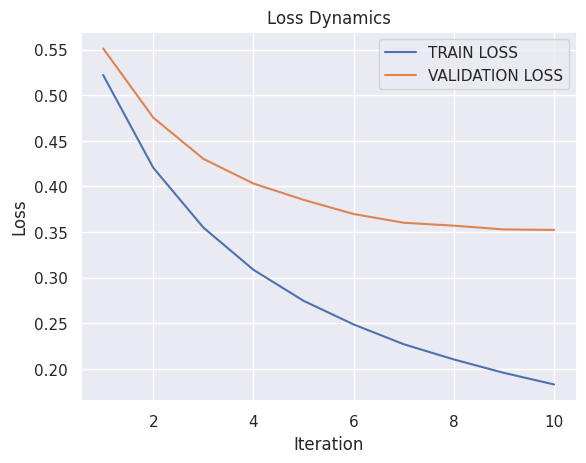

CPU times: user 2.41 s, sys: 64.3 ms, total: 2.47 s
Wall time: 2.47 s
Train ROC-AUC 0.9920
Valid ROC-AUC 0.9086
Test ROC-AUC 0.9027


In [ ]:
boosting = Boosting(plot=True, mute_steps=False)

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators, (len(boosting.models), boosting.n_estimators)
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

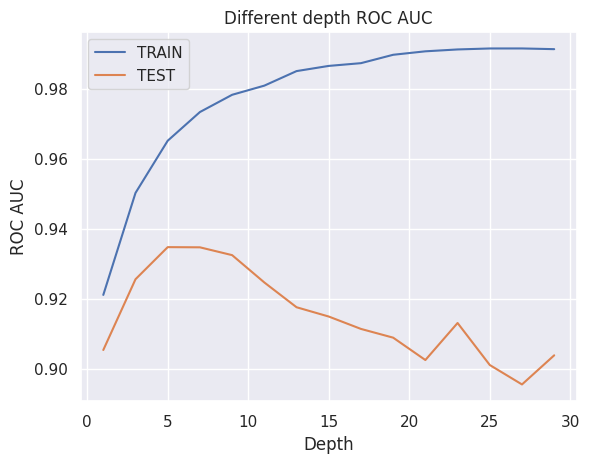

In [ ]:
results = {}

depths = range(1, 30, 2)
scores_test = []
scores_train = []
for d in depths:
    boosting = Boosting(base_model_params={"max_depth": d})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    scores_test.append(boosting.score(x_test, y_test))
    scores_train.append(boosting.score(x_train, y_train))

plt.plot(depths, scores_train, label="TRAIN")
plt.plot(depths, scores_test, label="TEST")
plt.title("Different depth ROC AUC")
plt.xlabel("Depth")
plt.ylabel("ROC AUC")
plt.legend()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Модель на 7 глубины имеет самое большое качество на тесте, на 30 глубины на трейне. Модели до глубины 7 не достаточно сложны, чтобы объяснить данные, модели после глубины 7 начинают обучаться на шум (то что данная модель не способна понять и обобщить). Я бы выбрал max_depth=7. Чтобы спасти модель от переобучения

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [ ]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Define the search space for DecisionTreeRegressor hyperparameters
    base_model_params = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 100),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0, 1.0),
    }
    boosting_params = {
            "n_estimators": trial.suggest_int('n_estimators', 1, 31, step=3),
            "learning_rate": trial.suggest_float('learning_rate', 10e-5, 0.9),
            "subsample": trial.suggest_float('subsample', 0.1, 1, step=0.1),
            "early_stopping_rounds": trial.suggest_int('early_stopping_rounds', 1, 10),
    }

    # Instantiate the Boosting class with the suggested base_model_params
    boosting = Boosting(base_model_params=base_model_params, **boosting_params)

    # Fit the Boosting model
    boosting.fit(x_train, y_train, x_valid, y_valid)

    # Evaluate the model using AUC ROC
    auc_roc = boosting.score(x_test, y_test)

    return 1 - auc_roc  # Optuna minimizes the objective, so we use 1 - AUC ROC for maximization

# Create a study object and optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)  # You can adjust the number of trials

# Print the best hyperparameters and result
print('Best trial:')
print('  ROC AUC: ', 1 - study.best_trial.value)  # Convert back to AUC ROC
print('  Params: ')
best_params = study.best_trial.params.items()

for key, value in best_params:
    print(f'    {key}: {value}')


...

Best trial:
  ROC AUC:  0.9370964364382962
  Params: 
    max_depth: 15
    min_samples_split: 0.11333197050223175
    min_samples_leaf: 9
    min_weight_fraction_leaf: 0.008755375361999232
    max_features: auto
    max_leaf_nodes: 26
    ccp_alpha: 2.630759031811472e-05
    n_estimators: 25
    learning_rate: 0.6628006909371295
    subsample: 0.5
    early_stopping_rounds: 2


In [ ]:
# 0.937 ROC AUC
best_params = list([('max_depth', 15), ('min_samples_split', 0.11333197050223175), ('min_samples_leaf', 9), ('min_weight_fraction_leaf', 0.008755375361999232), ('max_features', 'auto'), ('max_leaf_nodes', 26), ('ccp_alpha', 2.630759031811472e-05), ('n_estimators', 25), ('learning_rate', 0.6628006909371295), ('subsample', 0.5), ('early_stopping_rounds', 2)])

best_params_dict = dict(best_params); best_params_dict

base_model_params = {k: best_params_dict[k] for k in list(best_params_dict)[:7]}
ensemble_params = {k: best_params_dict[k] for k in list(best_params_dict)[7:]}
base_model_params, ensemble_params

({'max_depth': 15,
  'min_samples_split': 0.11333197050223175,
  'min_samples_leaf': 9,
  'min_weight_fraction_leaf': 0.008755375361999232,
  'max_features': 'auto',
  'max_leaf_nodes': 26,
  'ccp_alpha': 2.630759031811472e-05},
 {'n_estimators': 25,
  'learning_rate': 0.6628006909371295,
  'subsample': 0.5,
  'early_stopping_rounds': 2})

In [ ]:
import inspect
from sklearn.tree import DecisionTreeRegressor

inspect.signature(DecisionTreeRegressor)

<Signature (*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)>

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None, plot=False, return_roc=False, verbose=True):
  if plot:
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))
  if verbose:
    print(classifier_name, 'metrics')
  precision, recall, _ = precision_recall_curve(y_true, y_pred)
  if verbose:
    print('AUC-PR: %.5f' % auc(recall, precision))

  if plot:
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)


    ax[0].set_title("PRC")
    ax[0].set_ylim(0, 1.1)

    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
    print('AUC-ROC: %.5f' % roc_auc_score(y_true, y_pred))
    ax[1].set_title("ROC")
    ax[1].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.legend()

  if return_roc:
    return roc_auc_score(y_true, y_pred), auc(recall, precision)
  else:
    return auc(recall, precision)


Boosting metrics
AUC-PR: 0.96162
AUC-ROC: 0.93574


0.9616184172465166

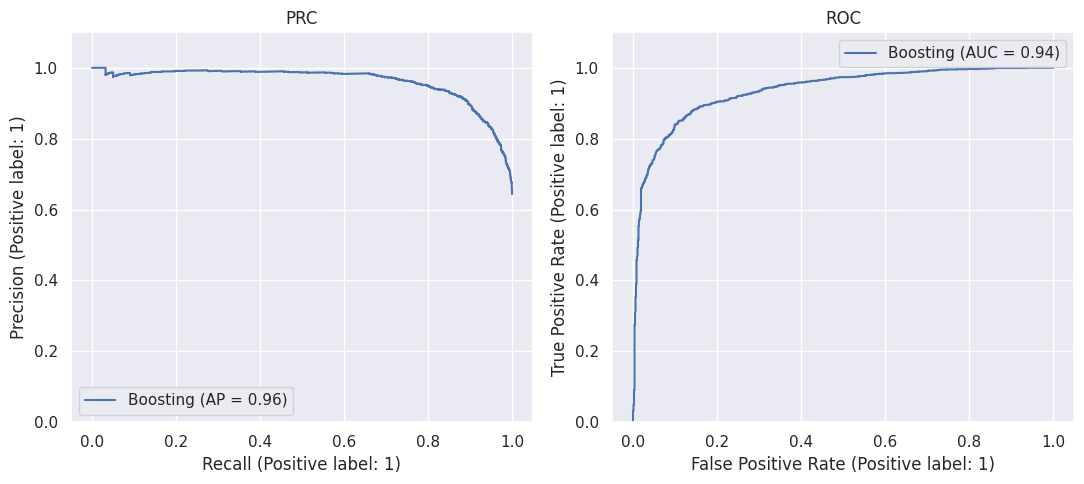

In [ ]:
best_model = Boosting(base_model_params=base_model_params, **ensemble_params)
best_model.fit(x_train, y_train, x_valid, y_valid)
preds = best_model.predict_proba(x_test)[:,1]

depict_pr_roc(y_test, preds, classifier_name="Boosting", plot=True)

Noob Logistic Regression metrics
AUC-PR: 0.96561
AUC-ROC: 0.94010


0.9656071853889611

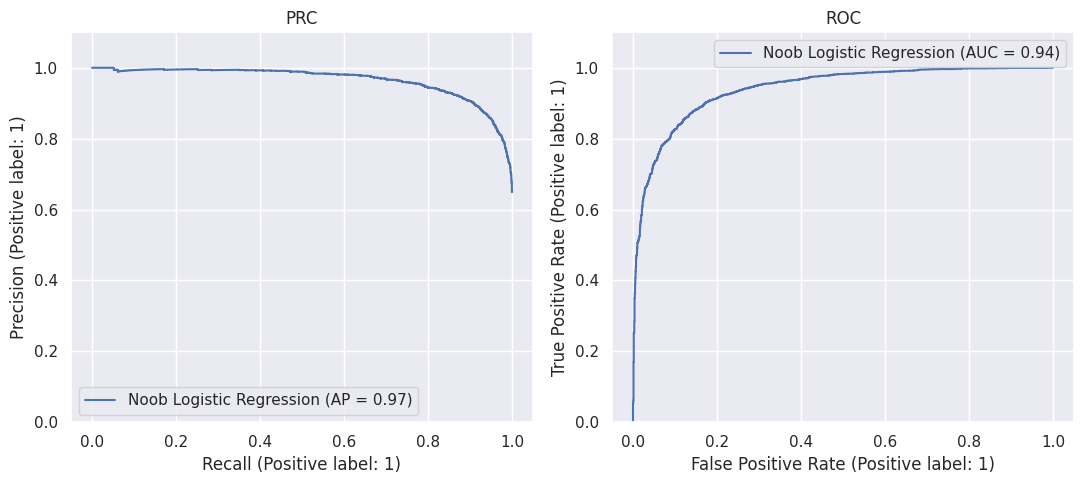

In [ ]:
from sklearn.linear_model import LogisticRegression

noob_model = LogisticRegression()
# noob_model.fit(np.vstack([x_train.toarray(), x_valid.toarray()]), np.vstack([y_train.toarray(), y_valid.toarray()])) # did not work for some reason
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2, random_state=1337)


noob_model.fit(x_train_reg, y_train_reg)
preds = noob_model.predict_proba(x_test_reg)[:,1]

depict_pr_roc(y_test_reg, preds, classifier_name="Noob Logistic Regression", plot=True)

Удивительно, но вышли такие же метрики (я проверял и ставил дефолтные параметры, и логистическая регрессия также хорошо работала). Кажется эти данные могут быть хорошо классифицированы линейными алгоритмами, и не обязательно много париться над обучением бустинга, однако так совсем не всегда, мы даже получили немного выше результат на PR кривой. Вообще, с hyper-parameter тюнингом возможно мы бы получили даже лучше результат на линейной регрессии



<br><br>

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [ ]:
print(x.shape)

fi_matrix = np.array([base_model.feature_importances_ for base_model in best_model.models] )
print(fi_matrix.shape)

feature_importances = np.mean(fi_matrix, axis=0)
feature_importances = feature_importances / np.sum(feature_importances)
assert np.sum(feature_importances) == 1

(23532, 169)
(25, 169)


(169,)


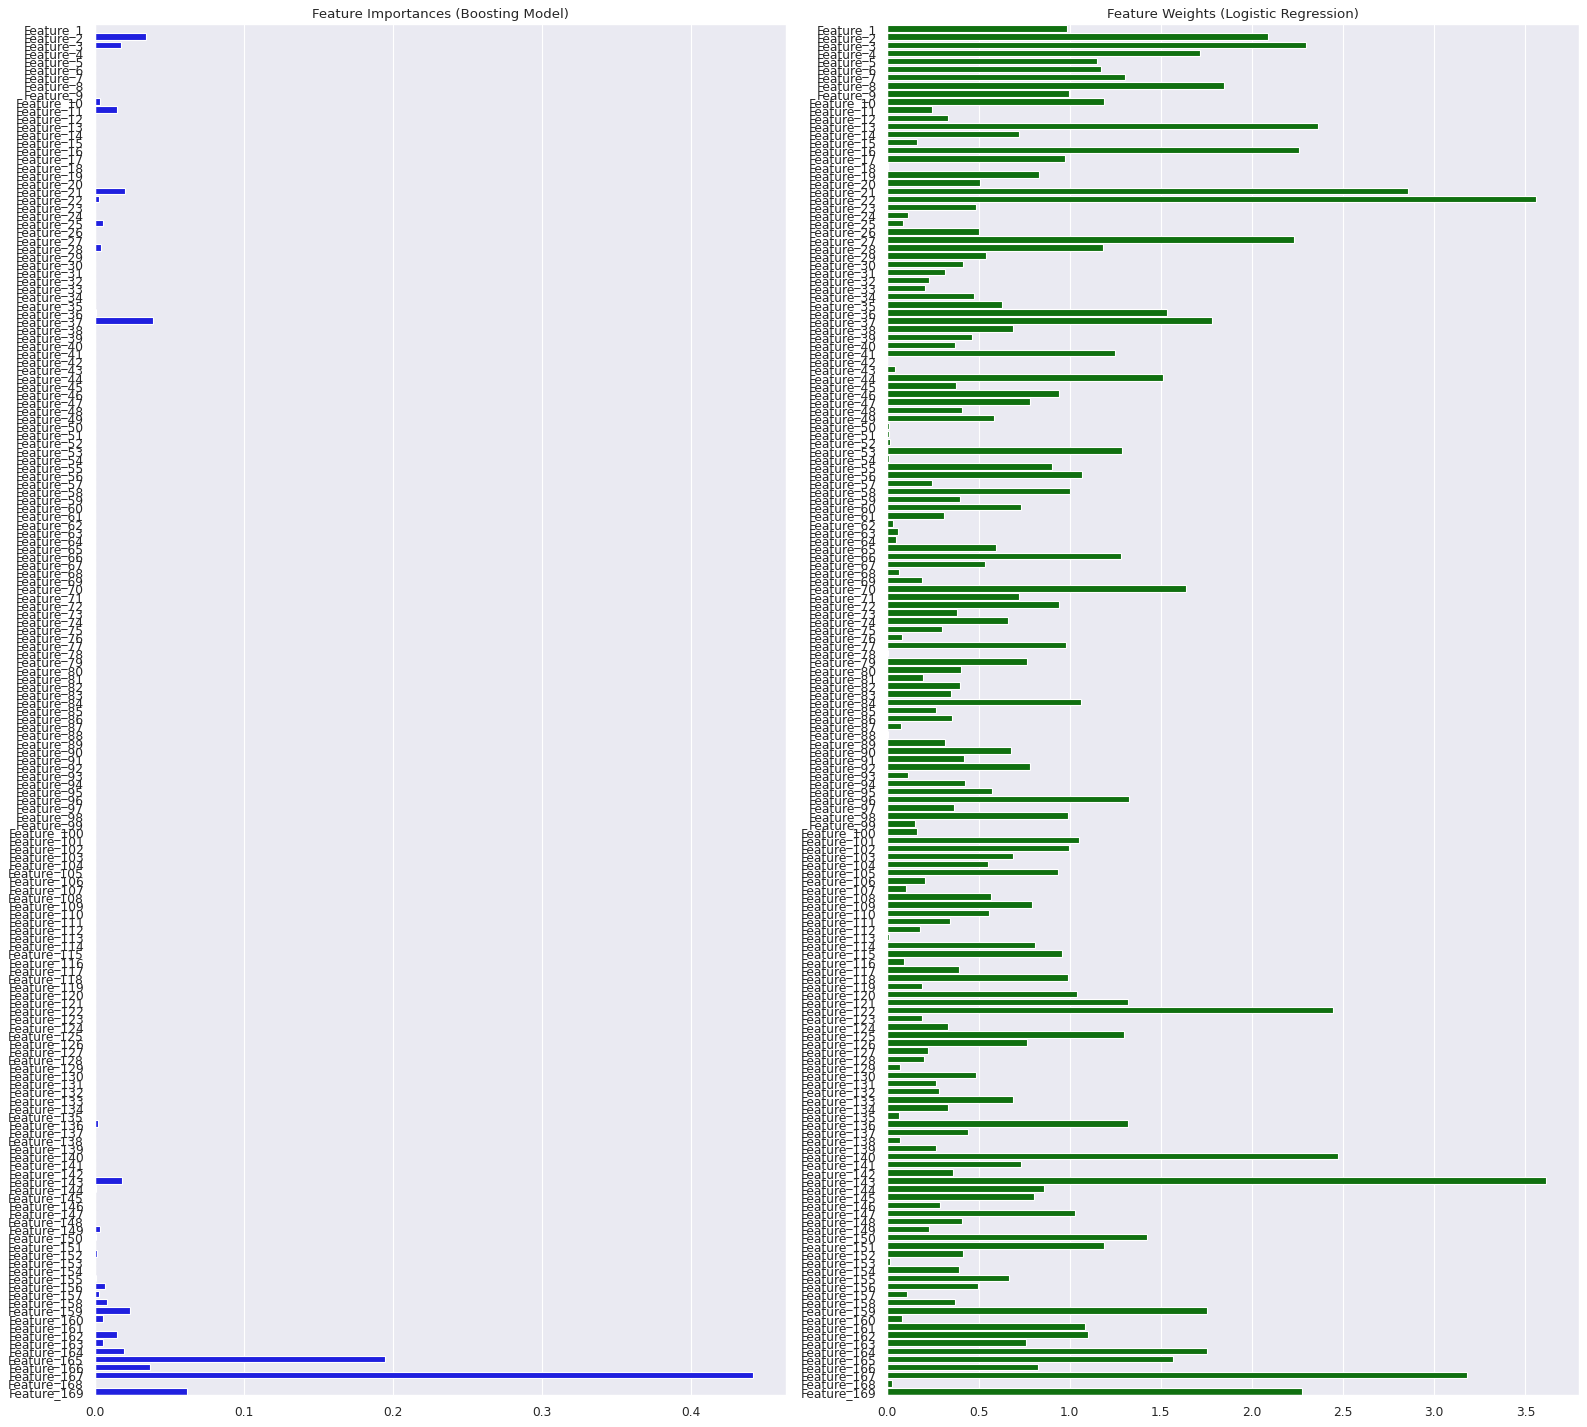

In [ ]:
from matplotlib.pyplot import figure
feature_names = [f'Feature_{i}' for i in range(1, len(feature_importances) + 1)]


# Plotting
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importances, y=feature_names, color='blue')
plt.title('Feature Importances (Boosting Model)')

feature_imp_log = np.reshape(noob_model.coef_, newshape=(-1,))
print(feature_imp_log.shape)

plt.subplot(1, 2, 2)
sns.barplot(x=np.abs(feature_imp_log), y=feature_names, color='green')
plt.title('Feature Weights (Logistic Regression)')

plt.tight_layout()
plt.show()

Логистическая регрессия использует очень много фичей, в то время, как градиентный бустинг способен выцеплять самые главные фичи и избегать проблем коллинеарности. Градиентный бустинг может использовать меньшее кол-во признаков, но как? Бустинг старается сфокусироваться на тех изменениях, которые больше всего приводят к точному обучению с обобщением на валидацию. Логистическая регрессия просто строит линейную гиперплоскость из всех фич.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

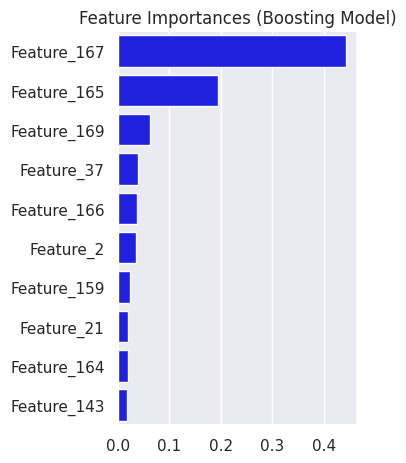

In [ ]:
# Plotting
best_features_idx = np.flip(np.argsort(feature_importances) )[:10]
best_features = feature_importances[best_features_idx]
feature_names = np.array(feature_names)[best_features_idx]

# figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
plt.subplot(1, 2, 1)
sns.barplot(x=best_features, y=feature_names, color='blue')
plt.title('Feature Importances (Boosting Model)')

plt.tight_layout()
plt.show()

Boosting for most valuable features metrics
AUC-PR: 0.96389
AUC-ROC: 0.93624


0.9638875689368188

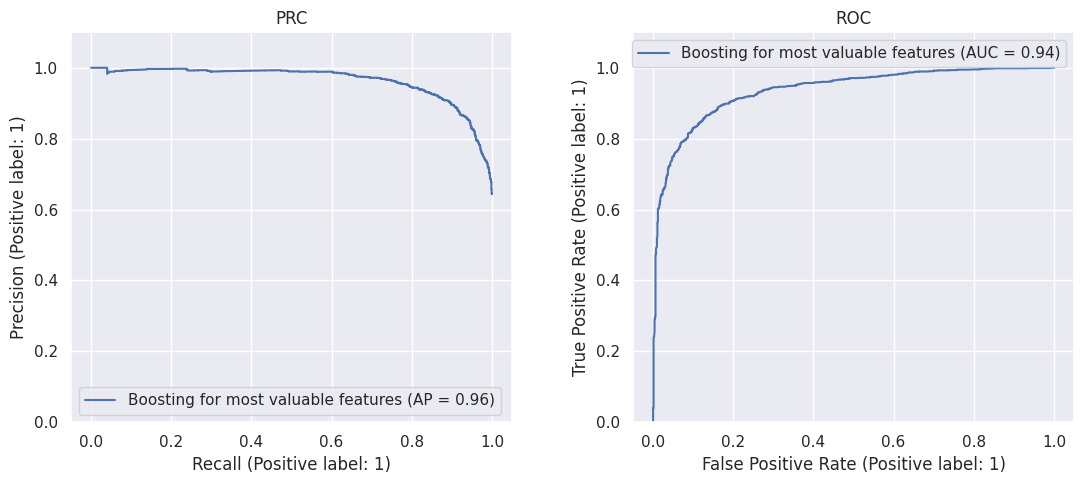

In [ ]:
best_model = Boosting(base_model_params=base_model_params, **ensemble_params)

best_model.fit(x_train[:, best_features_idx], y_train, x_valid[:, best_features_idx], y_valid)
preds = best_model.predict_proba(x_test[:, best_features_idx])[:,1]

depict_pr_roc(y_test, preds, classifier_name="Boosting for most valuable features", plot=True)

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
class SimpleBlend:
    def __init__(self, models):
        # Boosting and LogReg
        self.models = models

    def fit(self,x_train, y_train, x_valid, y_valid):
        if type(x_train) != np.ndarray:
            x_learn = np.vstack([x_train.toarray(), x_valid.toarray()])
        else:
            x_learn = np.vstack([x_train, x_valid])
        if type(y_train) != np.ndarray:
            y_learn = np.hstack([y_train.toarray(), y_valid.toarray()])
        else:
            y_learn = np.hstack([y_train, y_valid])

        self.models[0].fit(x_train, y_train, x_valid, y_valid)
        self.models[1].fit(x_learn, y_learn)
        return self

    def predict_proba(self, x):
        return sum([m.predict_proba(x)[:,1] for m in self.models]) / 2

In [ ]:
blend = SimpleBlend([Boosting(base_model_params=base_model_params, **ensemble_params), LogisticRegression()])

blend.fit(x_train, y_train, x_valid, y_valid)

Boosting for most valuable features metrics
AUC-PR: 0.96314
AUC-ROC: 0.93750


0.9631442872286706

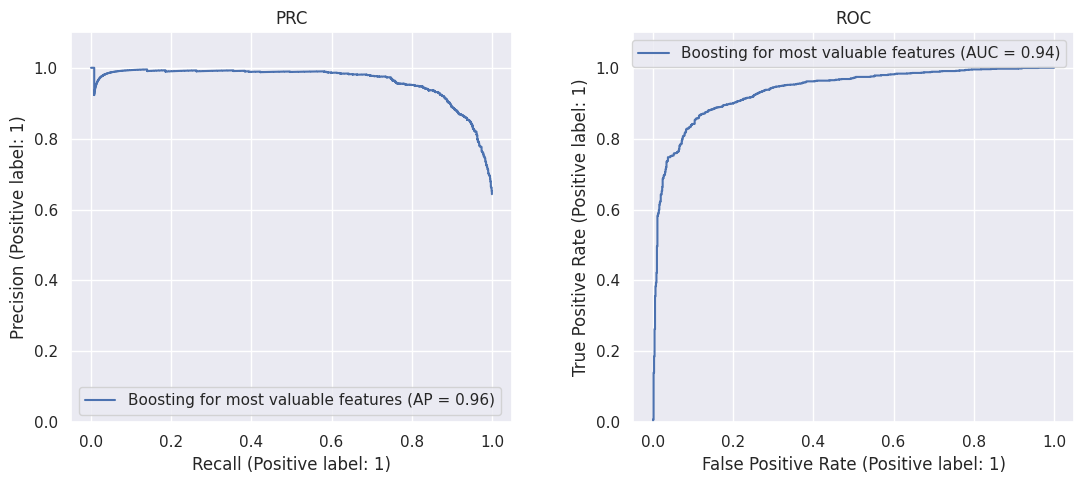

In [ ]:
preds = blend.predict_proba(x_test)

depict_pr_roc(y_test, preds, classifier_name="Boosting for most valuable features", plot=True)

In [ ]:
def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x))

class Blend(SimpleBlend):
    def __init__(self, models, boost_weight: float, logreg_weight: float):
        super().__init__(models)
        self.boost_weight = boost_weight
        self.logreg_weight = logreg_weight

    def predict_proba(self, x):
        m = self.models
        return m[0].predict_proba(x)[:,1] * self.boost_weight + m[1].predict_proba(x)[:,1] * self.logreg_weight

    def score(self, x, y):
        return score(self, x, y)

In [ ]:
import optuna
from sklearn.metrics import roc_auc_score

def objective(trial):

    boost_weight = trial.suggest_float('boost_weight', 0, 1)
    blending_w = {
        'boost_weight': trial.suggest_float('boost_weight', 0, 1),
        'logreg_weight': trial.suggest_float('logreg_weight', 0, 1)
    }

    blend = Blend([Boosting(base_model_params=base_model_params, **ensemble_params), LogisticRegression()], **blending_w)
    blend.fit(x_train, y_train, x_valid, y_valid)

    auc_roc = blend.score(x_test, y_test)
    return 1 - auc_roc

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  # You can adjust the number of iterations

# Print the best hyperparameters and result
print('Best trial:')
print('  ROC AUC: ', 1 - study.best_trial.value)  # Convert back to AUC ROC
print('  Params: ')
best_params = study.best_trial.params.items()

for key, value in best_params:
    print(f'    {key}: {value}')

[I 2023-12-19 11:08:34,559] A new study created in memory with name: no-name-9b230c16-8e8f-4894-aba2-2c6ffef4eab3
[I 2023-12-19 11:08:36,915] Trial 0 finished with value: 0.06015330888662507 and parameters: {'boost_weight': 0.17828483002647855, 'logreg_weight': 0.7331544003924001}. Best is trial 0 with value: 0.06015330888662507.
[I 2023-12-19 11:08:39,323] Trial 1 finished with value: 0.06270950666248909 and parameters: {'boost_weight': 0.23913212783562743, 'logreg_weight': 0.17689542578112405}. Best is trial 0 with value: 0.06015330888662507.
[I 2023-12-19 11:08:42,142] Trial 2 finished with value: 0.0637061640028781 and parameters: {'boost_weight': 0.9142022365994453, 'logreg_weight': 0.1505389905538702}. Best is trial 0 with value: 0.06015330888662507.
[I 2023-12-19 11:08:45,593] Trial 3 finished with value: 0.06156563374338497 and parameters: {'boost_weight': 0.49097514109770934, 'logreg_weight': 0.812652094138348}. Best is trial 0 with value: 0.06015330888662507.
[I 2023-12-19 11

Best trial:
  ROC AUC:  0.9398466911133749
  Params: 
    boost_weight: 0.17828483002647855
    logreg_weight: 0.7331544003924001


## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [ ]:
base_model_params

{'max_depth': 15,
 'min_samples_split': 0.11333197050223175,
 'min_samples_leaf': 9,
 'min_weight_fraction_leaf': 0.008755375361999232,
 'max_features': 'auto',
 'max_leaf_nodes': 26,
 'ccp_alpha': 2.630759031811472e-05}

0:	learn: 0.3236686	total: 20ms	remaining: 479ms
1:	learn: 0.2855707	total: 37.5ms	remaining: 431ms
2:	learn: 0.2648585	total: 45ms	remaining: 330ms
3:	learn: 0.2533092	total: 52.2ms	remaining: 274ms
4:	learn: 0.2378194	total: 58.4ms	remaining: 234ms
5:	learn: 0.2324505	total: 64.8ms	remaining: 205ms
6:	learn: 0.2274165	total: 71.8ms	remaining: 185ms
7:	learn: 0.2242827	total: 80.8ms	remaining: 172ms
8:	learn: 0.2191971	total: 94.3ms	remaining: 168ms
9:	learn: 0.2158271	total: 114ms	remaining: 170ms
10:	learn: 0.2122837	total: 129ms	remaining: 164ms
11:	learn: 0.2092620	total: 144ms	remaining: 156ms
12:	learn: 0.2069276	total: 161ms	remaining: 149ms
13:	learn: 0.2046667	total: 172ms	remaining: 135ms
14:	learn: 0.2022825	total: 178ms	remaining: 119ms
15:	learn: 0.2004270	total: 184ms	remaining: 104ms
16:	learn: 0.1979950	total: 192ms	remaining: 90.1ms
17:	learn: 0.1963010	total: 198ms	remaining: 77ms
18:	learn: 0.1938859	total: 204ms	remaining: 64.4ms
19:	learn: 0.1926356	total: 214ms	r

0.9625138204510673

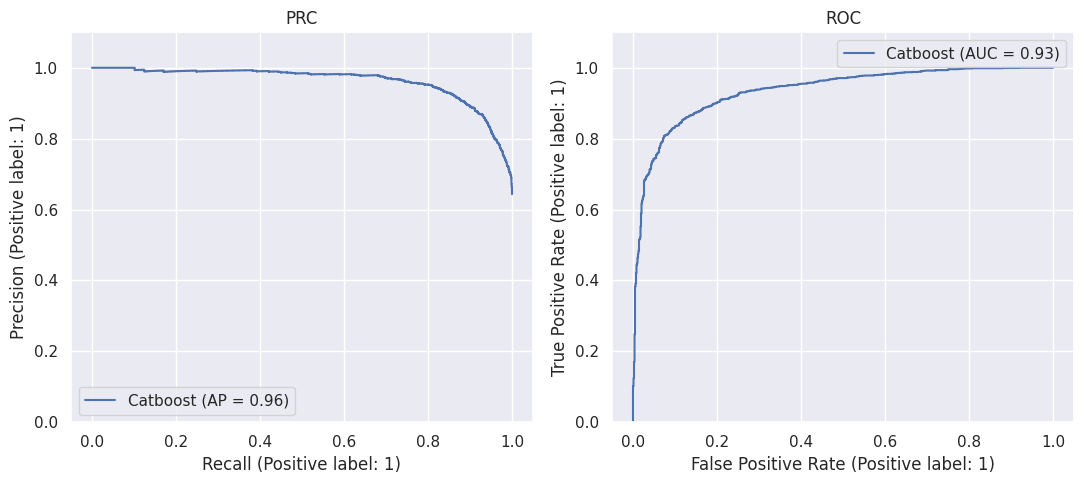

In [ ]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(iterations=25,
                           depth=5,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
model.fit(x_train, y_train)
# make the prediction using the resulting model
preds_class = model.predict(x_test)
preds_proba = model.predict_proba(x_test)[:, 1]

depict_pr_roc(y_test, preds_proba, classifier_name="Catboost", plot=True)

У меня даже получилось немного лучше, без подбора гипер-параметров если. На бустинге я имею 0.94 вместо 0.93 AUC ROC.